# Árboles de decisiones
## Elaborado por: Martín Ordóñez

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.loc[:, ['sepal length (cm)', 
               'sepal width (cm)',
               'petal length (cm)',
               'petal width (cm)']]

In [5]:
y = df.loc[:, 'target'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

### Árbol de decisión

In [7]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [8]:
# Mirando algunos hiperparámetros que parecen ajustables
clf

DecisionTreeClassifier(max_depth=2, random_state=0)

In [9]:
# entrenar el modelo 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [10]:
# Predecir para una observación
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([0])

In [11]:
# Predecir para varias observaciones
clf.predict(X_test[0:10])


array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1])

In [12]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [13]:
# calcular la precisión de clasificación
score = clf.score(X_test, y_test)
score

0.9473684210526315

In [14]:
# Lista de valores para probar max_depth:
max_depth_range = list(range(1, 6))
# Lista para almacenar el RMSE promedio para cada valor de max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

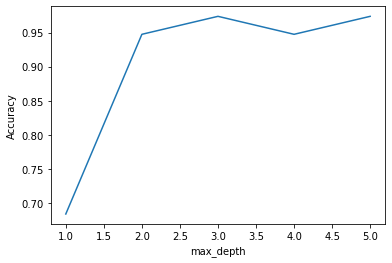

In [15]:
# Visualizar qué max_depth conduce a la mayor precisión
plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy');